###  Import Libraries

In [1]:
#importing libraries
import pandas as pd          # data analysis library for handling structured data
import numpy as np           # mathematical library for working with numerical data
import datetime
from pivottablejs import pivot_ui
import pandas_profiling

# Visualization
import matplotlib.pyplot as plt     # data visualization library for creating graphs and charts
%matplotlib inline
import seaborn as sns        # data visualization library based on matplotlib for creating more attractive visualizations
import plotly
import plotly.express as px   # interactive data visualization library
import plotly.graph_objects as go   # library for creating interactive graphs and charts
from plotly.subplots import make_subplots 
import missingno as msno 
import kaleido 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

import calendar
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

### Load Dataset

In [2]:
smart_home = pd.read_csv(r"../Smart Home Dataset with weather Information/HomeC.csv", low_memory=False) 
smart_home.columns 

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature', 'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'], dtype='object')

In [3]:
#check the number of rows and columns
def print_dim(df):
    '''
    Function to print the dimensions of a given python dataframe
    Required Input -
        - df = Pandas DataFrame
    Expected Output -
        - Data size
    '''
    print("Data size: Rows-{0} Columns-{1}".format(df.shape[0],df.shape[1]))
print_dim(smart_home)
smart_home.head(4)

Data size: Rows-503911 Columns-32


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [117]:
# The weather and energy dataset
# The dataset contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region.

# Data Columns Descriptions:
# (source: Data Source: https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information)

# Index 
# time: Time of the readings, with a time span of 1 minute.

# Energy Usage
# use [kW]: Total energy consumption
# gen [kW]: Total energy generated by means of solar or other power generation resources
# House overall [kW]: overall house energy consumption
# Dishwasher [kW]: energy consumed by specific appliance
# Furnace 1 [kW]: energy consumed by specific appliance
# Furnace 2 [kW]: energy consumed by specific appliance
# Home office [kW]: energy consumed by specific appliance
# Fridge [kW]: energy consumed by specific appliance
# Wine cellar [kW]: energy consumed by specific appliance
# Garage door [kW]: energy consumed by specific appliance
# Kitchen 12 [kW]: energy consumption in kitchen 1
# Kitchen 14 [kW]: energy consumption in kitchen 2
# Kitchen 38 [kW]: energy consumption in kitchen 3
# Barn [kW]: energy consumed by specific appliance
# Well [kW]: energy consumed by specific appliance
# Microwave [kW]: energy consumed by specific appliance
# Living room [kW]: energy consumption in Living room
# Solar [kW]: Solar power generation

# Weather
# temperature: Temperature is a physical quantity expressing hot and cold.
# humidity: Humidity is the concentration of water vapour present in air.
# visibility: Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.
# apparentTemperature: Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.
# pressure: Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather
# windSpeed: Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.
# cloudCover: Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the sky obscured by clouds when observed from a particular location. Okta is the usual unit of measurement of the cloud cover.
# windBearing: In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."
# dewPoint: the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.
# precipProbability: A probability of precipitation (POP), also referred to as chance of precipitation or chance of rain, is a measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location.
# precipIntensity: The intensity of rainfall is a measure of the amount of rain that falls over time. The intensity of rain is measured in the height of the water layer covering the ground in a period of time. It means that if the rain stays where it falls, it would form a layer of a certain height.

# Others
# summary: Report generated by the by the data collection systm (apparently!).
    # Including:
        # Clear, Mostly Cloudy, Overcast, Partly Cloudy, Drizzle,
        #  Light Rain, Rain, Light Snow, Flurries, Breezy, Snow,
        #  Rain and Breezy, Foggy, Breezy and Mostly Cloudy,
        #  Breezy and Partly Cloudy, Flurries and Breezy, Dry,
        #  Heavy, Snow.
# icon: The icon that is used by the data collection system (apparently!).
        # Including:
        # cloudy, clear-night, partly-cloudy-night, clear-day, partly-cloudy-day, rain, snow, wind, fog.

### Basic Preprocessing 

> explore various columns and their datatypes

In [118]:
# #to find datatype that is not object and/or float.
# result = [col for col in smart_home.columns if smart_home[col].dtype != "object" and smart_home[col].dtype != "float"]
# if result == []:
#     print ("None: all datatypes are either float or object")
# else:
#     print(result)

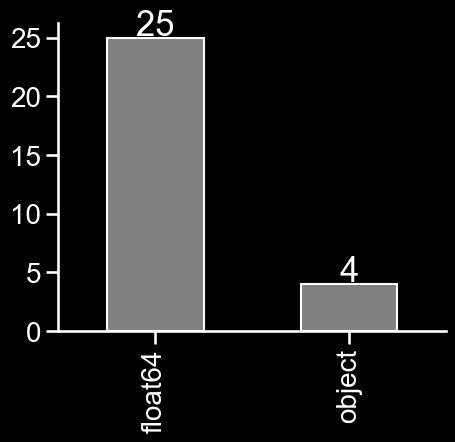

In [4]:
#sum similar consumption
smart_home['Furnace [kW]'] = smart_home[['Furnace 1 [kW]','Furnace 2 [kW]']].sum(axis=1)
smart_home['Kitchen [kW]'] = smart_home[['Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]']].sum(axis=1) #We could also use the mean 
smart_home.drop(['Furnace 1 [kW]','Furnace 2 [kW]','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]'], axis=1, inplace=True)


#check datatypes of features
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.figure(figsize = (5,4))
ax = smart_home.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.2, height, ha = 'center', size = 25)
sns.despine() 

In [5]:
#put the datatypes in perspective
def view_datatypes_in_perspective(df):
    '''
    Function to group dataframe columns into three common dtypes and visualize the columns
    Required Input - 
        - df = Pandas DataFrame
    Expected Output -
        - three unique datatypes (float, object, others(for the rest))
    '''
    float = 0
    float_col = []
    object = 0
    object_col = []
    others = 0
    others_col = []
    for col in df.columns:
        if df[col].dtype ==  "float":
            float += 1
            float_col.append(col) 
        elif df[col].dtypes == "object":
            object += 1
            object_col.append(col)
        else:
            others +=1
            others_col.append(col)
            others_col.append(smart_home[col].dtype)        
    print (f" float = {float} \t{float_col}, \n \nobject = {object} \t{object_col}, \n\nothers = {others} \t{others_col} ")

view_datatypes_in_perspective(smart_home)

 float = 25 	['use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability', 'Furnace [kW]', 'Kitchen [kW]'], 
 
object = 4 	['time', 'icon', 'summary', 'cloudCover'], 

others = 0 	[] 


> Data Profiling

In [121]:
def do_data_profiling(df, filename):
    '''
    Function to do basic data profiling
    Required Input - 
        - df = Pandas DataFrame
        - filename = Path for output file with a .html extension
    Expected Output -
        - HTML file with data profiling summary
    '''
    profile = pandas_profiling.ProfileReport(df)
    profile.to_file(output_file = filename)
    print("Data profiling done")
    
do_data_profiling(smart_home, "smart_home_profile.csv")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data profiling done


In [122]:
'''
            RESULT FROM THE DATA PROFILING
1.  There are NaN values present (at least) in the last row
2.  cloudCover is an unsupported type, check if it needs cleaning or further analysis	- Unsupported 
        i.e cloudCover has both numeric and non-numeric values. The non-numeric values will be converted to NaN, and fillna
3.  time is an unsupported type, check if it needs cleaning or further analysis	        - Unsupported
4.  Dataset has 16 (< 0.1%) duplicate rows	                                        - Duplicates 
5.  use [kW], House overall [kW] and Kitchen 14 [kW]                                    - High Correlation
6.  gen [kW] and Solar [kW]                                                             - High Correlation
7.  Fridge [kW] and Kitchen 12 [kW]                                                     - High Correlation
8.  Solar [kW] and gen [kW]                                                             - High Correlation
9.  temperature, apparentTemperature, and dewPoint                                      - High Correlation
10. humidity, visibility, precipIntensity, precipProbability, and summary               - High Correlation
11. icon and summary                                                                    - High Correlation
12. summary is highly imbalanced (66.0%)	                                        - Imbalance
13. Garage door [kW] is highly skewed (γ1 = 38.43480163)	                        - Skewed
14. Dishwasher [kW] has 182720 (36.3%) zeros	                                        - Zeros
15. Kitchen 14 [kW] has 50310 (10.0%) zeros	                                        - Zeros
16. Kitchen 38 [kW] has 247710 (49.2%) zeros	                                        - Zeros
17. precipIntensity has 416607 (82.7%) zeros	                                        - Zeros
18. precipProbability has 416607 (82.7%) zeros                                          - Zeros

'''

'\n            RESULT FROM THE DATA PROFILING\n1.  There are NaN values present (at least) in the last row\n2.  cloudCover is an unsupported type, check if it needs cleaning or further analysis\t- Unsupported \n        i.e cloudCover has both numeric and non-numeric values. The non-numeric values will be converted to NaN, and fillna\n3.  time is an unsupported type, check if it needs cleaning or further analysis\t        - Unsupported\n4.  Dataset has 16 (< 0.1%) duplicate rows\t                                        - Duplicates \n5.  use [kW], House overall [kW] and Kitchen 14 [kW]                                    - High Correlation\n6.  gen [kW] and Solar [kW]                                                             - High Correlation\n7.  Fridge [kW] and Kitchen 12 [kW]                                                     - High Correlation\n8.  Solar [kW] and gen [kW]                                                             - High Correlation\n9.  temperature, apparentTemp

> Handling Missing Values

In [6]:
#Drop NaN values and replace non-numeric
#drop Nan values
#convert to numeric

#function to replace non-numeric values in the all column
def replace_non_numeric(df: pd.DataFrame, columns):
    """
    Replaces non-numeric values in the specified columns of a Pandas dataframe with NaN.

    Parameters:
        df (pd.DataFrame): The dataframe to process.
        columns (list): A list of column names to replace non-numeric values in.

    Returns:
        pd.DataFrame: The updated dataframe with non-numeric values replaced by NaN.
    """
    for col in columns:
        df.dropna(subset = col, inplace= True)
        if df[col].dtype == 'object' or df[col].dtype == 'float':
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # df.dropna(subset = col, inplace= True)
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # df.dropna(subset = col, inplace= True)
    return df

smart_home = replace_non_numeric(smart_home, columns= ['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'])

smart_home.shape 

(503910, 29)

In [7]:
# Treat missing values in numeric columns (Fillna values in cloudCover)

#visualize the non-float datatypes to check for anormally
smart_home[["time", "icon", "summary", "cloudCover"]].head(10)
##NB: cloudCover has both numeric and non-numeric values. 
##NB: the [:57] values in cloudCover are labelled "cloudCover" instead of float types. They would be replaced with NaN

,time,icon,summary,cloudCover
0,1.451624e+09,clear-night,Clear,NaN
1,1.451624e+09,clear-night,Clear,NaN
2,1.451624e+09,clear-night,Clear,NaN
3,1.451624e+09,clear-night,Clear,NaN
4,1.451624e+09,clear-night,Clear,NaN
5,1.451624e+09,clear-night,Clear,NaN
6,1.451624e+09,clear-night,Clear,NaN
7,1.451624e+09,clear-night,Clear,NaN
8,1.451624e+09,clear-night,Clear,NaN
9,1.451624e+09,clear-night,Clear,NaN


In [8]:
#figuring out how to fill the NaN values in cloudCover. 
#It is important to note that cloudCover has a strong relationship with Temperature (and apparentTemperature).
#cloudCover was NaN when apparentTemperature was 29.26. However, there were other occassions when cloudCover was not NaN
#at that same apparentTemperature. We would then replace cloudCover NaN with these value(s).


smart_home[(smart_home["apparentTemperature"] == 29.26) & (smart_home["cloudCover"].notnull())][:10]

#from the code above, apparentTemperature at 29.26 (the same value when cloudCover was NaN) also had non-Nan values of 
    #cloudCover set at 0.1. This value will be used to replace cloudCover NaN values. 

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace [kW],Kitchen [kW]
467603,1.452092e+09,0.775083,0.004750,0.775083,0.000000,0.042283,0.017950,0.007800,0.012817,0.033250,0.001000,0.002883,0.001550,0.004750,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.103550,0.000900
467604,1.452092e+09,0.871583,0.004783,0.871583,0.000017,0.042233,0.005233,0.007950,0.012967,0.033400,0.000967,0.002917,0.001500,0.004783,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.187333,0.000950
467605,1.452092e+09,1.288233,0.004767,1.288233,0.000050,0.041917,0.005450,0.008133,0.013333,0.033317,0.001000,0.002933,0.001500,0.004767,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.532383,0.001200
467606,1.452092e+09,1.418550,0.004767,1.418550,0.000083,0.041750,0.005500,0.008467,0.013317,0.033450,0.001017,0.002900,0.001533,0.004767,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.640583,0.001250
467607,1.452092e+09,1.424717,0.004800,1.424717,0.000067,0.041817,0.005900,0.008267,0.013467,0.033417,0.001000,0.002950,0.001550,0.004800,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.638933,0.001267
467608,1.452092e+09,1.418033,0.004767,1.418033,0.000067,0.041767,0.005467,0.008183,0.013300,0.033350,0.000983,0.002883,0.001567,0.004767,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.637150,0.001250
467609,1.452092e+09,1.421767,0.004800,1.421767,0.000083,0.041850,0.005500,0.008383,0.013450,0.033700,0.001000,0.002933,0.001483,0.004800,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.636250,0.001250
467610,1.452092e+09,1.404133,0.004783,1.404133,0.000067,0.041817,0.005483,0.008217,0.013350,0.033433,0.001000,0.002917,0.001600,0.004783,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.621067,0.001217
467611,1.452092e+09,1.270833,0.004800,1.270833,0.000067,0.053867,0.005450,0.008450,0.013500,0.033633,0.000983,0.002983,0.001567,0.004800,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.576550,0.001100
467612,1.452092e+09,0.934050,0.004833,0.934050,0.000017,0.114467,0.005633,0.008250,0.013283,0.033783,0.001000,0.002983,0.001500,0.004833,36.41,clear-day,0.51,10.0,Clear,29.26,1023.27,9.86,0.1,331.0,0.0,20.03,0.0,0.299483,0.000967


In [9]:
#fill Nan Values in the cloudCover column
def treat_missing_numeric(df,columns,how = 'mean', value = None):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mean', 'mode', 'median','ffill', numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mean':
        for i in columns:
            print("Filling missing values with mean for columns - {0}".format(i))
            df[i] = df[i].fillna(df[i].mean())
            
    elif how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df[i] = df[i].fillna(df[i].mode())
    
    elif how == 'median':
        for i in columns:
            print("Filling missing values with median for columns - {0}".format(i))
            df[i] = df[i].fillna(df[i].median())
    
    elif how == 'ffill':
        for i in columns:
            print("Filling missing values with forward fill for columns - {0}".format(i))
            df[i] = df[i].fillna(method ='ffill')
    
    elif how == 'digit':
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how, i))
            df[i] = df[i].fillna(str(value)) 
      
    else:
        print("Missing value fill cannot be completed")
    return df.head(5)

treat_missing_numeric(smart_home, ["cloudCover"], how="digit", value = 0.1)  

Filling missing values with digit for columns - cloudCover


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace [kW],Kitchen [kW]
0,1.451624e+09,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.1,282.0,0.0,24.4,0.0,0.082617,0.000567
1,1.451624e+09,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.1,282.0,0.0,24.4,0.0,0.084533,0.000567
2,1.451624e+09,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.1,282.0,0.0,24.4,0.0,0.083017,0.000617
3,1.451624e+09,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.1,282.0,0.0,24.4,0.0,0.175417,0.000650
4,1.451624e+09,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.1,282.0,0.0,24.4,0.0,0.300917,0.000783


> Datetime formatting

In [10]:
smart_home.shape

(503910, 29)

In [11]:
#convert timestamp to datetime format 
# def convert_timestamp(ts):
#     """
#     Converts a Unix timestamp to a formatted date and time string.

#     Args:
#         ts (int): The Unix timestamp to convert.

#     Returns:
#         str: A formatted date and time string in the format 'YYYY-MM-DD HH:MM:SS'.
#     """
#     utc_datetime = datetime.datetime.utcfromtimestamp(ts)
#     formatted_datetime = utc_datetime.strftime('%Y-%m-%d %H:%M:%S')
#     # formatted_datetime = pd.to_datetime(formatted_datetime, infer_datetime_format=True) 
#     return formatted_datetime


# # Use apply() to convert the entire timestamp column to formatted strings
# smart_home['time'] = smart_home['time'].apply(convert_timestamp)
# smart_home['time'] = pd.to_datetime(smart_home['time'], infer_datetime_format=True) 

time_index = pd.date_range('2016-01-01 05:00:00', periods=503910,  freq='min')  
time_index = pd.DatetimeIndex(time_index) 
smart_home.set_index(time_index, inplace=True) #set time column as index
smart_home.drop(columns=["time"] , axis=1, inplace=True)  
smart_home.head(4)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace [kW],Kitchen [kW]
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.1,282.0,0.0,24.4,0.0,0.082617,0.000567
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.1,282.0,0.0,24.4,0.0,0.084533,0.000567
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.1,282.0,0.0,24.4,0.0,0.083017,0.000617
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.1,282.0,0.0,24.4,0.0,0.175417,0.000650


In [12]:
#Recheck the datatypes
float = 0
object = 0
object_col = []
others = 0
others_col = []
for col in smart_home.columns:
    if smart_home[col].dtype ==  "float":
        float += 1
    elif smart_home[col].dtypes == "object":
        object += 1
        object_col.append(col)
    else:
        others +=1
        others_col.append(col)
        others_col.append(smart_home[col].dtype)
        
print (f" float = {float}, object = {object} {object_col}, and others = {others} {others_col} ")

 float = 25, object = 3 ['icon', 'summary', 'cloudCover'], and others = 0 [] 


In [13]:
#recheck for NaN values
smart_home = smart_home.select_dtypes(include=["float64", "int64"]) #selecting only numerical columns 
def view_NaN(df):
    """
    Prints the name of any column in a Pandas DataFrame that contains NaN values.

    Parameters:
        - df: Pandas DataFrame

    Returns:
        - None
    """
    for col in df.columns:
        if df[col].isnull().any() == True:
            print("there is NaN present in column:", col)
        else:
            print("No NaN present in column:", col)


view_NaN(smart_home)

No NaN present in column: use [kW]
No NaN present in column: gen [kW]
No NaN present in column: House overall [kW]
No NaN present in column: Dishwasher [kW]
No NaN present in column: Home office [kW]
No NaN present in column: Fridge [kW]
No NaN present in column: Wine cellar [kW]
No NaN present in column: Garage door [kW]
No NaN present in column: Barn [kW]
No NaN present in column: Well [kW]
No NaN present in column: Microwave [kW]
No NaN present in column: Living room [kW]
No NaN present in column: Solar [kW]
No NaN present in column: temperature
No NaN present in column: humidity
No NaN present in column: visibility
No NaN present in column: apparentTemperature
No NaN present in column: pressure
No NaN present in column: windSpeed
No NaN present in column: windBearing
No NaN present in column: precipIntensity
No NaN present in column: dewPoint
No NaN present in column: precipProbability
No NaN present in column: Furnace [kW]
No NaN present in column: Kitchen [kW]


> Duplicate Detection 

In [132]:
#the duplicate detected will be ignored as it is authentic data

> Noisy Data and Outliers

In [14]:
from sklearn.covariance import EllipticEnvelope

# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)

# Select only numeric columns
# numeric_cols = smart_home.select_dtypes(include=["float64", "int64"])

# Fit detector
outlier_detector.fit(smart_home)

# Predict outliers
outlier_predictions = outlier_detector.predict(smart_home) 

# Add outlier predictions to original dataframe
smart_home["outlier"] = outlier_predictions 




# The EllipticEnvelope algorithm is a robust covariance estimator that fits an ellipse to the central region of the data, 
# ignoring observations that are considered outliers. It is a method for detecting outliers in multivariate data that are 
# assumed to be normally distributed. The contamination parameter specifies the proportion of data points that are expected 
# to be outliers.

# The predict method of the LOF object is then used to predict whether each observation in numeric_cols is an outlier 
# or not, with 1 indicating a normal observation and -1 indicating an outlier.

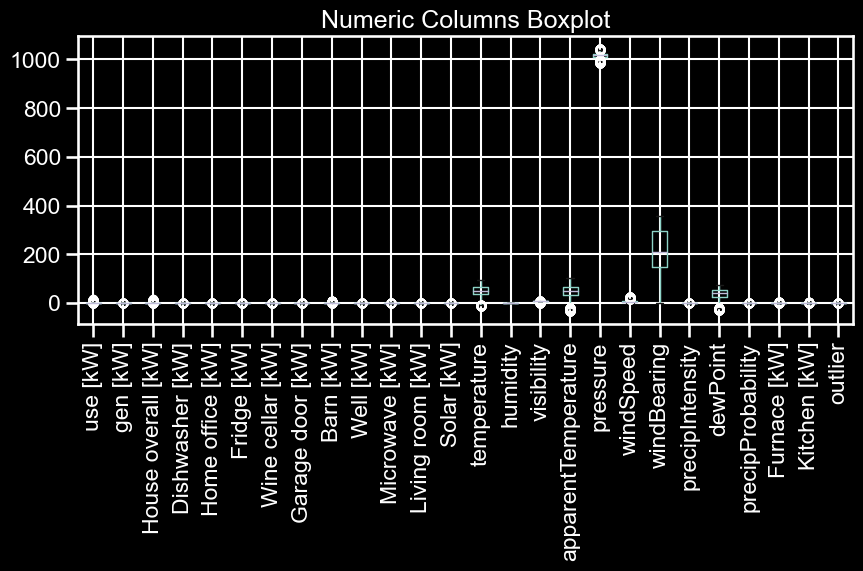

In [15]:

# Create the boxplot
smart_home.boxplot(rot=90) 

# Set the title of the plot
plt.title('Numeric Columns Boxplot')

# Adjust subplot spacing to prevent x-axis labels from being cut off
plt.subplots_adjust(bottom=0.4)

# Increase the size of the plot
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Save the plot to a file
fig.savefig('Images/outlier2.png', dpi=300)

### Exploratory Data Analysis (EDA)

In [16]:
energy_data = smart_home.filter(items=[ 'use [kW]','gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
                                     'Furnace [kW]', 'Home office [kW]', 'Fridge [kW]',
                                     'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen [kW]',
                                     'Barn [kW]', 'Well [kW]', 'Microwave [kW]', 'Living room [kW]', 'Solar [kW]']) 

weather_data = smart_home.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature', 'pressure',
                                      'windSpeed', 'windBearing', 'dewPoint', 'cloudCover']) 

In [17]:
energy_data.head(2)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.082617,0.442633,0.12415,0.006983,0.013083,0.000567,0.03135,0.001017,0.004067,0.001517,0.003483
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.084533,0.444067,0.12400,0.006983,0.013117,0.000567,0.03150,0.001017,0.004067,0.001650,0.003467


In [18]:
weather_data.head(3)

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint
2016-01-01 05:00:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2016-01-01 05:01:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4
2016-01-01 05:02:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4


> Visualization the data

>> data per hour

In [19]:
energy_per_hour = energy_data.resample('H').sum()

weather_data_hour = weather_data.resample('H').sum()

energy_per_hour.head(2)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
2016-01-01 05:00:00,62.647783,0.198417,62.647783,0.003817,23.591283,14.508850,2.271667,3.801033,0.782767,0.049234,2.332833,0.062533,1.299100,0.090283,0.198417
2016-01-01 06:00:00,55.090017,0.205300,55.090017,0.005950,27.402450,2.597617,4.531317,6.776500,0.770167,0.044917,2.350883,0.061250,0.252967,0.097083,0.205300


In [20]:
#since the data ranges from January till November, we plot it monthly. 
#January
# Select the columns of interest
cols = ['Dishwasher [kW]','House overall [kW]',
        'Furnace [kW]', 'Home office [kW]', 'Fridge [kW]',
        'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
        'Kitchen [kW]', 'Barn [kW]', 'Well [kW]',
        'Microwave [kW]', 'Living room [kW]', 'Solar [kW]']


fig = px.line(data_frame=energy_per_hour.loc["2016-01-01 05:00:00" : "2016-01-31 23:00:00"].filter(items=cols),
              line_dash_sequence=['solid']*16, width=900, height=600, title="January") 
fig.show()


In [21]:
#finding the average daily comsumption (per week) .....in KWh
energy_per_day = energy_per_hour.resample('D').sum() 
weather_data_day = weather_data.resample('D').mean()

energy_per_week = energy_per_hour.resample('W').sum()
weather_data_week = energy_per_hour.resample('W').mean()

energy_per_month = energy_per_hour.resample('M').sum()
weather_data_month = energy_per_hour.resample('M').mean()

weather_data_day.head(2) 

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint
2016-01-01,35.725737,0.631825,9.759298,29.815211,1014.740316,7.386772,263.689474,24.429175
2016-01-02,31.692569,0.580056,9.953722,24.462806,1014.510944,8.148319,264.529167,18.498597


In [22]:
cols_energy = ['Dishwasher [kW]','House overall [kW]',
        'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
        'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
        'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
        'Microwave [kW]', 'Living room [kW]', 'Solar [kW]']

cols_weather = ['temperature','humidity', 'visibility', 'apparentTemperature', 'pressure', 
                 'windSpeed', 'windBearing', 'dewPoint', 'cloudCover']


fig = px.line(data_frame=energy_per_day.loc["2016-01-01" : "2016-01-31"].filter(items=cols_energy),
              line_dash_sequence=['solid']*16, width=900, height=600, title="January") 
 
fig.show()

In [24]:
# Iterate through each month in the year and generate the plots
# "2016-01-01" : "2016-01-31"
# import calendar 
for month in range(1, 13):
    # Filter the energy and weather data for the current month
    start_date = f'2016-{month:02}-01'
    end_date = f'2016-{month:02}-' + str(calendar.monthrange(2016, month)[1])
    energy_per_day_month = energy_per_day.loc[start_date:end_date].filter(items=cols_energy)
    weather_data_day_month = weather_data_day.loc[start_date:end_date].filter(items=cols_weather)
    
    # Generate the plots for the current month
    fig_energy = px.line(data_frame=energy_per_day_month, line_dash_sequence=['solid']*15, width=900, height=600, title=f'Energy Consumption - {calendar.month_name[month]}')
    fig_weather = px.line(data_frame=weather_data_day_month, line_dash_sequence=['solid']*6, width=900, height=600, title=f'Weather Data - {calendar.month_name[month]}')
        
    # Save the plots to files
    fig_energy.write_image(f'Images/energy_{month:02}.png')
    fig_weather.write_image(f'Images/weather_{month:02}.png') 
    
    # Show the plots
    fig_energy.show()
    fig_weather.show()


>> Interpreting the chart above

In [ ]:
#insights from the data

>>> Device/Equipment consumptions

In [25]:
#Define new columns from datetime 
smart_home['month'] = smart_home.index.month 
smart_home['day'] = smart_home.index.day 
smart_home['weekday'] = smart_home.index.day_name() 
smart_home['hour'] = smart_home.index.hour 
smart_home['minute'] = smart_home.index.minute 
smart_home.head(2) 

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Furnace [kW],Kitchen [kW],outlier,month,day,weekday,hour,minute
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.082617,0.000567,1,1,1,Friday,5,0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.084533,0.000567,1,1,1,Friday,5,1


Month

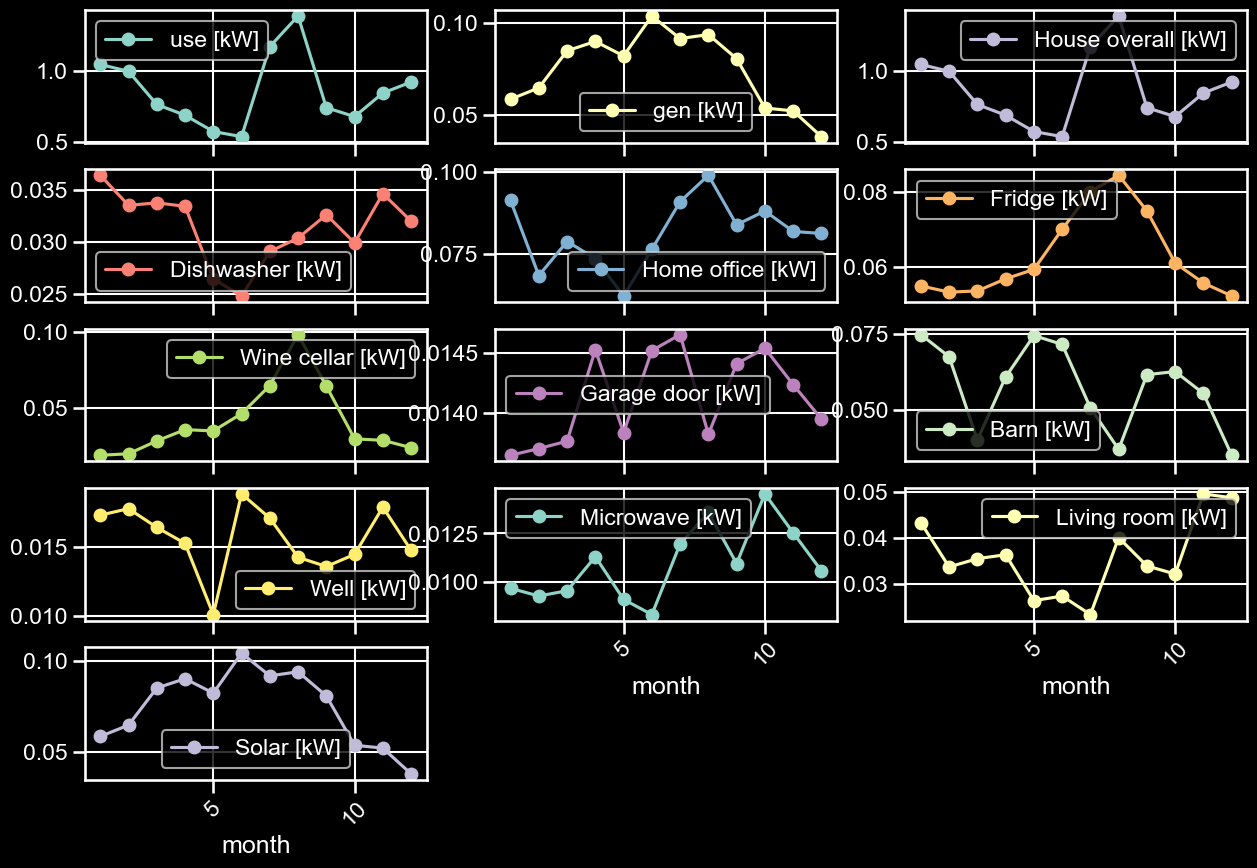

In [27]:
##Averge consuption per month 
colums_use = ['Dishwasher [kW]','House overall [kW]',
        'Furnace [kW]', 'Home office [kW]', 'Fridge [kW]',
        'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen [kW]',
        'Barn [kW]', 'Well [kW]', 'Microwave [kW]', 'Living room [kW]', 'Solar [kW]']

mean_month = smart_home.groupby('month').agg({i:'mean' for i in smart_home.columns[:-5].tolist()}) 
mean_month[mean_month.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');  
plt.savefig("Images/mean_energy_per_month.png")
# mean_month = smart_home.groupby('month').agg({i:'mean' for i in smart_home[colums_use].tolist()}) 
# mean_month[mean_month[colums_use].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
#                                                        grid=True, rot=45, xlabel=None, marker='o');

In [ ]:
# # Group the data by month and calculate the mean of each column
# mean_month = smart_home.groupby('month').agg({i: 'mean' for i in smart_home.columns[:-5].tolist()})

# # Create the plot with the desired settings
# fig, ax = plt.subplots(figsize=(15, 10))
# mean_month[mean_month.columns[0:13].tolist()].plot(ax=ax, subplots=True, layout=(-1, 3), marker='o')
# ax.set_xticks([2, 4, 6, 8, 10, 12])
# ax.set_facecolor('white')
# ax.grid(True)
# ax.set_xlabel(None)
# ax.tick_params(axis='x', rotation=45) 
# plt.show()


Weekday

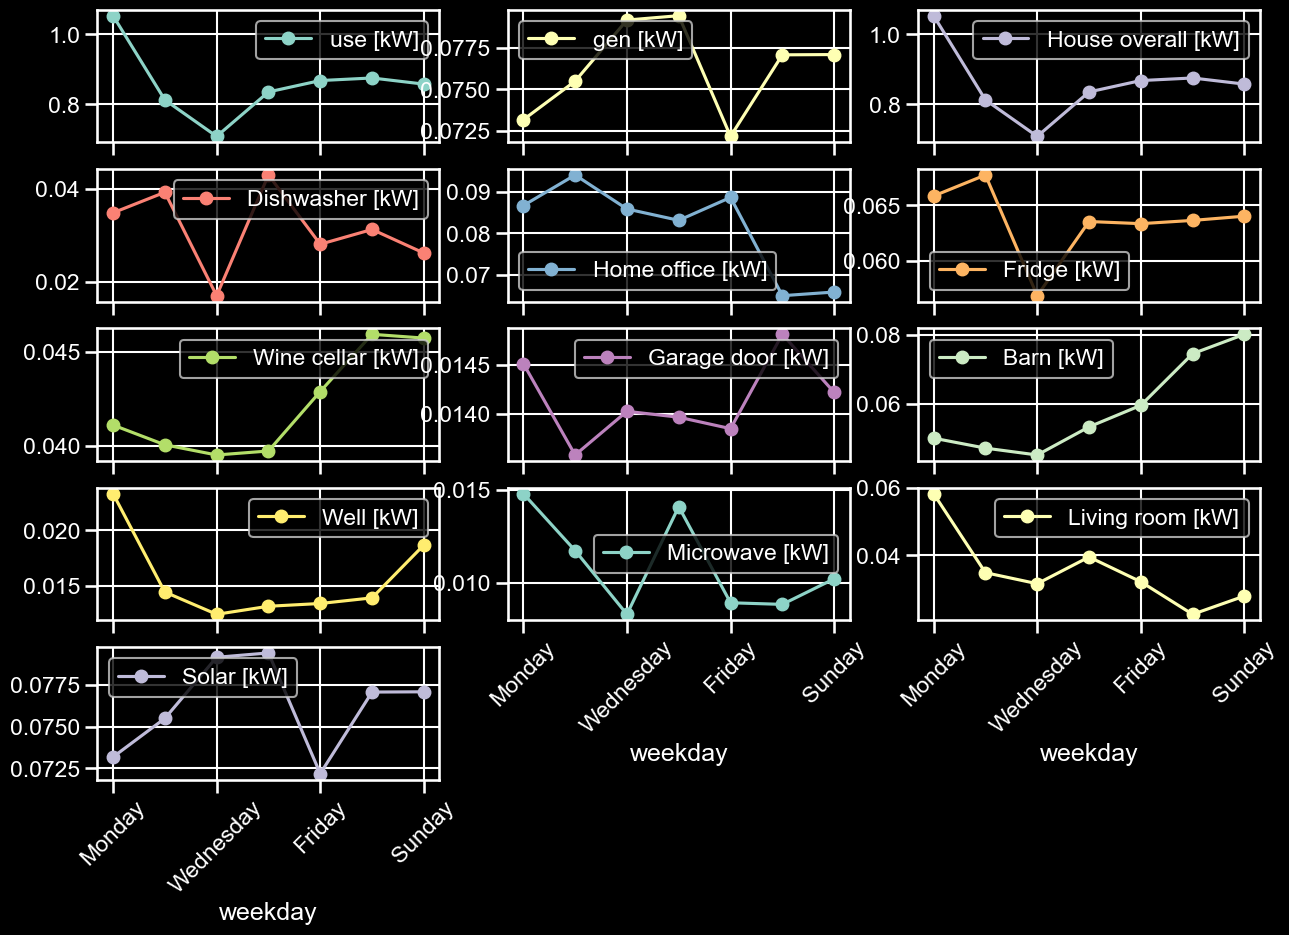

In [28]:
#Averge consuption per day of the week
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = smart_home.groupby('weekday').agg({i:'mean' for i in smart_home.columns[:-5].tolist()}).reindex(days)

mean_weekday[mean_weekday.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');
plt.savefig("Images/mean_energy_day_of_week.png")

Hour

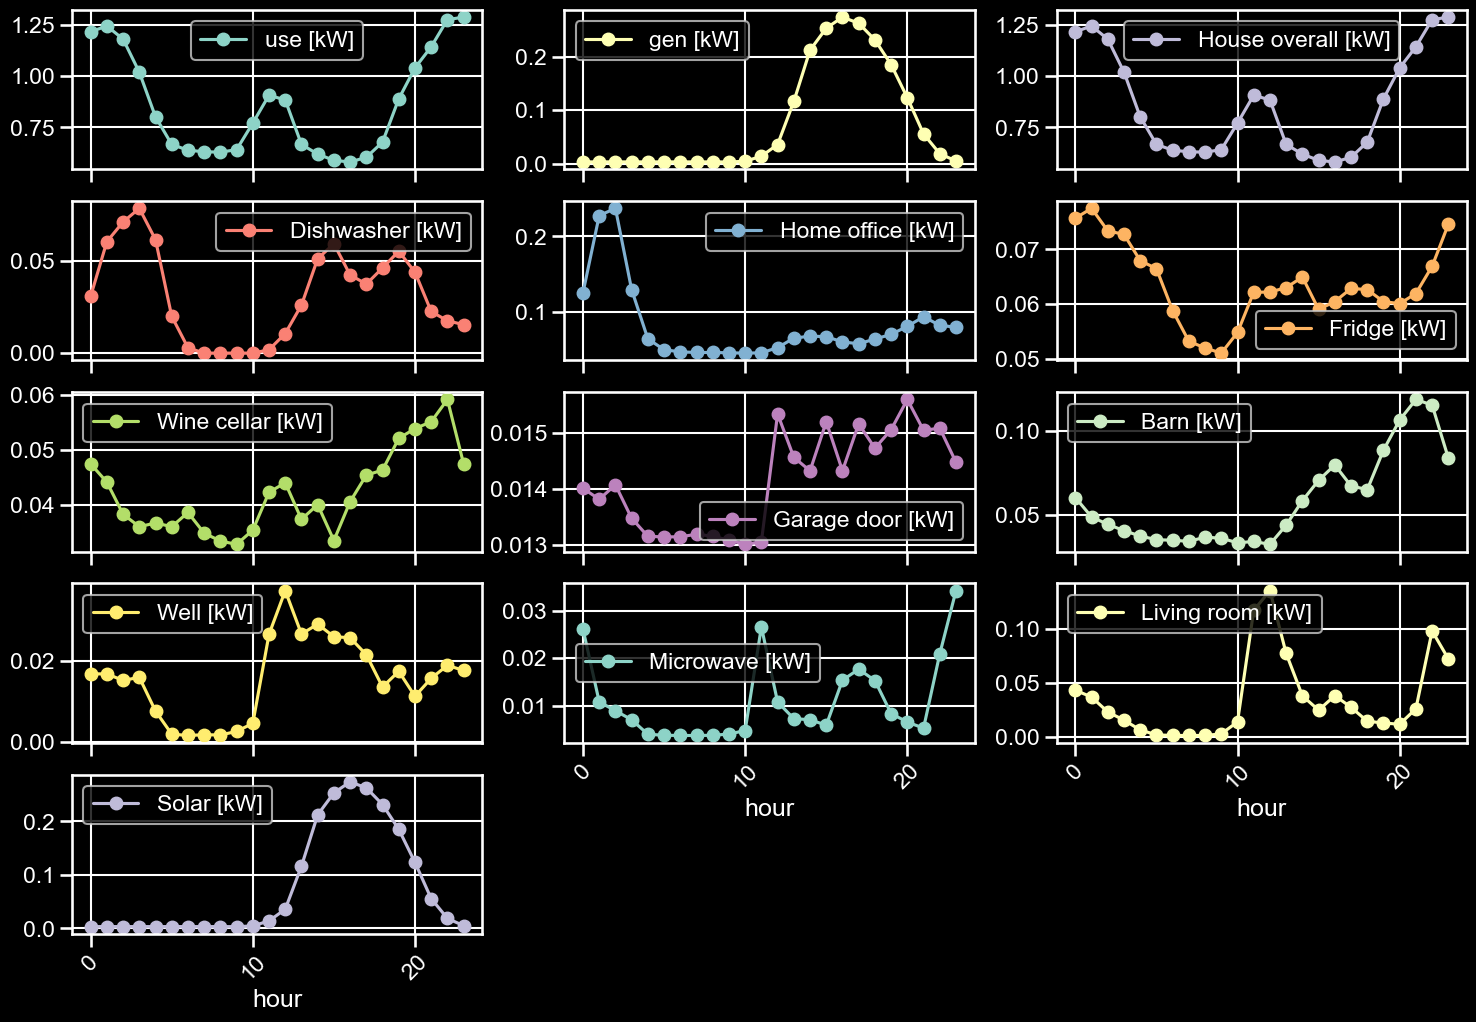

In [29]:
#Averge consuption per hour
mean_hour = smart_home.groupby('hour').agg({i:'mean' for i in smart_home.columns[:-5].tolist()})

mean_hour[mean_hour.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 12),
                                                       grid=True, rot=45, xlabel=None, marker='o');
plt.savefig("Images/mean_energy_per_hour.png")

### Time Series Analysis